<a href="https://colab.research.google.com/github/poojabv/test-git/blob/master/MidTerm3_APO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [57]:
#LOAD DATA
data=pd.read_csv("creditcard.csv")


In [58]:
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [59]:
#view first six rows of dataset
data[0:6]

#find total observations in dataset
len(data.index)

data = clean_dataset(data)

#FIT LOGISTIC REGRESSION MODEL
X = data[['V1','V2']]
y = data['Class']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)



In [60]:
#MODEL DIAGNOSTICS

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9978747203579418


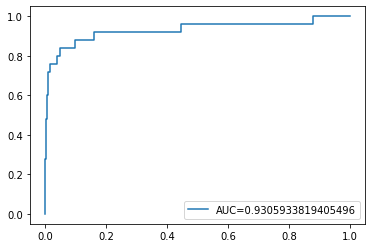

In [61]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [70]:
# save the model to disk
filename = 'midtermAPO.pkl'
pickle.dump(log_regression, open(filename, 'wb'))
 

In [63]:
model = log_regression

In [64]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [65]:
result = loaded_model.score(X_test, y_test)
print(result)

0.9978747203579418


In [35]:
from sklearn import svm
from sklearn import datasets

In [37]:
clf = svm.SVC()


In [38]:
X, y= datasets.load_iris(return_X_y=True)


In [ ]:
clf.fit(X, y)


In [42]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [44]:
from joblib import dump, load
dump(clf, 'MidTerm3_APO.joblib') 

['MidTerm3_APO.joblib']

In [45]:
clf = load('MidTerm3_APO.joblib') 